In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from cnnes import DeepCnnEs,DeepVisualizationHelper

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd


num_classes = 10

In [2]:

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train_short = x_train[0:1000,:,:,:]
y_train_short = y_train[0:1000,:]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [33]:
# Base deep model builder
def get_deep_model(with_classifier=False):
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape, name='input'))
    model.add(Conv2D(4, (3, 3), activation='relu', name='conv_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='max_p_1'))
    model.add(Conv2D(4, (3, 3), activation='relu', name='conv_2'))
    model.add(Flatten(name='flat_1'))
    if with_classifier:
        model.add(Dropout(0.1, name='drop_1'))
        model.add(Dense(num_classes, activation='softmax', name='dens_1'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model



In [26]:
batch_size = 500
num_classes = 10
epochs = 500


es_deep_model = get_deep_model()
kk=DeepCnnEs.DeepCnnEs(es_deep_model, LinearSVC(), iterations=epochs, batch_size=batch_size, L1=0.0)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, LinearDiscriminantAnalysis(solver='svd'), iterations=epochs, batch_size=batch_size)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, KNeighborsClassifier(n_neighbors=5), iterations=epochs, batch_size=batch_size, L1=0.01)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, GaussianProcessClassifier(), iterations=epochs)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, DecisionTreeClassifier(random_state=0), iterations=epochs, L1=0.01, batch_size=batch_size)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, SGDClassifier(shuffle=True, penalty='l2'), iterations=epochs)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, GradientBoostingClassifier(), iterations=epochs)
# kk=DeepCnnEs.DeepCnnEs(es_deep_model, RandomForestClassifier(), iterations=epochs, L0=0.5)
# kk.get_model_weights_()
kk.fit(x_train_short, y_train_short.argmax(axis=1))

cnnes_res = kk.predict(x_test)
cnn_es_test_score = metrics.accuracy_score(y_test.argmax(axis=1), cnnes_res)
cnnes_res = kk.predict(x_train)
cnn_es_train_score = metrics.accuracy_score(y_train.argmax(axis=1), cnnes_res)

print(str(cnn_es_train_score) + ' ' + str(cnn_es_test_score))

evals: ax-ratio max(std)   f-value
   21:     1.0  4.9e-01  0.05800000000000005
   42:     1.0  4.9e-01  0.05800000000000005
   63:     1.0  4.8e-01  0.05500000000000005
   84:     1.0  4.8e-01  0.04600000000000004
  105:     1.0  4.7e-01  0.04800000000000004
  126:     1.0  4.7e-01  0.04800000000000004
  147:     1.0  4.6e-01  0.05300000000000005
  168:     1.0  4.6e-01  0.05400000000000005
  189:     1.0  4.6e-01  0.05400000000000005
evals: ax-ratio max(std)   f-value
  210:     1.0  4.5e-01  0.04500000000000004
  231:     1.0  4.5e-01  0.05500000000000005
  252:     1.0  4.5e-01  0.04200000000000004
  273:     1.0  4.4e-01  0.04600000000000004
  294:     1.0  4.4e-01  0.04300000000000004
  315:     1.0  4.4e-01  0.04400000000000004
  336:     1.0  4.3e-01  0.040000000000000036
  357:     1.0  4.3e-01  0.04300000000000004
  378:     1.0  4.3e-01  0.03700000000000003
  399:     1.0  4.3e-01  0.039000000000000035
evals: ax-ratio max(std)   f-value
  420:     1.0  4.2e-01  0.03900000000

 3549:     1.2  3.5e-01  0.03300000000000003
evals: ax-ratio max(std)   f-value
 3570:     1.2  3.5e-01  0.028000000000000025
 3591:     1.2  3.5e-01  0.03200000000000003
 3612:     1.2  3.5e-01  0.029000000000000026
 3633:     1.2  3.5e-01  0.03600000000000003
 3654:     1.2  3.5e-01  0.039000000000000035
 3675:     1.2  3.5e-01  0.03400000000000003
 3696:     1.2  3.5e-01  0.03200000000000003
 3717:     1.2  3.5e-01  0.03500000000000003
 3738:     1.2  3.5e-01  0.03600000000000003
 3759:     1.2  3.5e-01  0.03500000000000003
evals: ax-ratio max(std)   f-value
 3780:     1.2  3.5e-01  0.03500000000000003
 3801:     1.2  3.5e-01  0.03300000000000003
 3822:     1.2  3.5e-01  0.03400000000000003
 3843:     1.2  3.5e-01  0.03500000000000003
 3864:     1.2  3.5e-01  0.03600000000000003
 3885:     1.2  3.5e-01  0.03300000000000003
 3906:     1.2  3.5e-01  0.03400000000000003
 3927:     1.2  3.5e-01  0.03700000000000003
 3948:     1.2  3.5e-01  0.03200000000000003
 3969:     1.2  3.5e-01  0.

 7077:     1.3  3.3e-01  0.03400000000000003
 7098:     1.3  3.3e-01  0.03300000000000003
 7119:     1.3  3.3e-01  0.029000000000000026
evals: ax-ratio max(std)   f-value
 7140:     1.3  3.3e-01  0.031000000000000028
 7161:     1.3  3.3e-01  0.03700000000000003
 7182:     1.3  3.3e-01  0.03400000000000003
 7203:     1.3  3.3e-01  0.03300000000000003
 7224:     1.3  3.3e-01  0.03200000000000003
 7245:     1.3  3.3e-01  0.031000000000000028
 7266:     1.3  3.3e-01  0.03600000000000003
 7287:     1.3  3.2e-01  0.031000000000000028
 7308:     1.3  3.2e-01  0.03400000000000003
 7329:     1.3  3.2e-01  0.03600000000000003
evals: ax-ratio max(std)   f-value
 7350:     1.3  3.2e-01  0.03300000000000003
 7371:     1.3  3.2e-01  0.03300000000000003
 7392:     1.3  3.2e-01  0.03400000000000003
 7413:     1.3  3.2e-01  0.031000000000000028
 7434:     1.3  3.2e-01  0.03200000000000003
 7455:     1.3  3.2e-01  0.031000000000000028
 7476:     1.3  3.2e-01  0.030000000000000027
 7497:     1.3  3.2e-01

In [18]:
# from cnnes import DeepCnnEs
kk.objective_(kk.best_solution[0], x_train, y_train.argmax(axis=1))
len(kk.get_model_weights_flatten_())

336

In [19]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

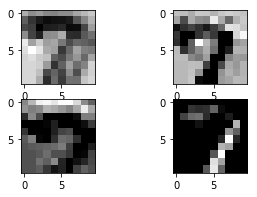

In [20]:
from keras.models import Model
from matplotlib import pyplot as plt
model = kk.deep_model
# model = cnn_model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[52].reshape(1,28,28,1))
display_activation(activations, 2, 2, 3)
plt.show()


In [36]:
import numpy as np

def group_visualize(transformed_data, method='pca'):
    x_transform = transformed_data
    if method == 'pca':
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(x_transform)
#         print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
        plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train_short.argmax(axis=1))
        plt.show()
    if method == 'tsne':
        n_sne = 7000
        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
        # tsne_results = tsne.fit_transform(x_train.reshape((1000, 28*28)))
        tsne_results = tsne.fit_transform(x_transform)
        plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_train_short.argmax(axis=1))
        plt.show()


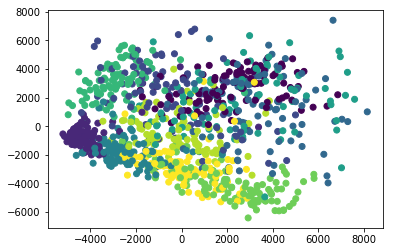

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.010s...
[t-SNE] Computed neighbors for 1000 samples in 0.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2845.386441
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.018372
[t-SNE] Error after 600 iterations: 0.825753


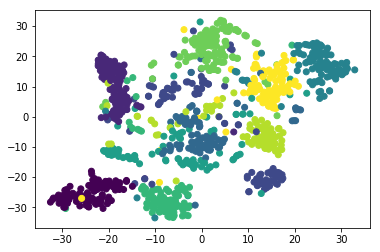

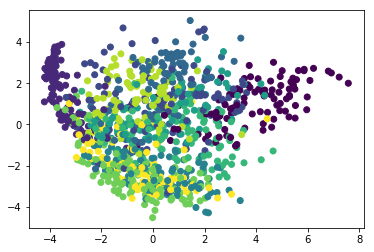

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.022s...
[t-SNE] Computed neighbors for 1000 samples in 1.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.899746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.737617
[t-SNE] Error after 600 iterations: 0.907879


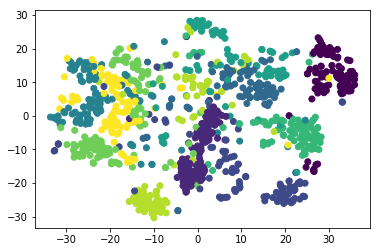

In [37]:
x_transform = kk.deep_model.predict(x_train_short)
group_visualize(x_transform, 'pca')
group_visualize(x_transform, 'tsne')

x_transform = np.reshape(x_train_short,(1000,28*28))
group_visualize(x_transform, 'pca')
group_visualize(x_transform, 'tsne')

In [38]:
batch_size = 500
num_classes = 10
epochs = 1000

cnn_model = get_deep_model(True)
cnn_model.fit(x_train_short, y_train_short, batch_size=batch_size, epochs=epochs, verbose=1)

cnn_res = cnn_model.predict(x_test).argmax(axis=1)
cnn_test_score = metrics.accuracy_score(y_test.argmax(axis=1), cnn_res)
cnn_res = cnn_model.predict(x_train).argmax(axis=1)
cnn_traint_score = metrics.accuracy_score(y_train.argmax(axis=1), cnn_res)


Epoch 1/1000
1000/1000 [==============================] - 0s 322us/step - loss: 2.3498 - acc: 0.1120
Epoch 2/1000
1000/1000 [==============================] - 0s 14us/step - loss: 2.2948 - acc: 0.1510
Epoch 3/1000
1000/1000 [==============================] - 0s 17us/step - loss: 2.2530 - acc: 0.1830
Epoch 4/1000
1000/1000 [==============================] - 0s 16us/step - loss: 2.2106 - acc: 0.2480
Epoch 5/1000
1000/1000 [==============================] - 0s 18us/step - loss: 2.1424 - acc: 0.3020
Epoch 6/1000
1000/1000 [==============================] - 0s 15us/step - loss: 2.0555 - acc: 0.3800
Epoch 7/1000
1000/1000 [==============================] - 0s 16us/step - loss: 1.9076 - acc: 0.4680
Epoch 8/1000
1000/1000 [==============================] - 0s 16us/step - loss: 1.6876 - acc: 0.5660
Epoch 9/1000
1000/1000 [==============================] - 0s 17us/step - loss: 1.4274 - acc: 0.6290
Epoch 10/1000
1000/1000 [==============================] - 0s 15us/step - loss: 1.1840 - acc: 0.666

1000/1000 [==============================] - 0s 15us/step - loss: 0.2202 - acc: 0.9310
Epoch 82/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1975 - acc: 0.9430
Epoch 83/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.2027 - acc: 0.9360
Epoch 84/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.2075 - acc: 0.9390
Epoch 85/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.2241 - acc: 0.9250
Epoch 86/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.1977 - acc: 0.9370
Epoch 87/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.1835 - acc: 0.9520
Epoch 88/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1824 - acc: 0.9420
Epoch 89/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1846 - acc: 0.9440
Epoch 90/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.2084 - acc: 0.9270
Epoc

1000/1000 [==============================] - 0s 15us/step - loss: 0.0904 - acc: 0.9720
Epoch 161/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0836 - acc: 0.9730
Epoch 162/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0906 - acc: 0.9680
Epoch 163/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0795 - acc: 0.9750
Epoch 164/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0930 - acc: 0.9730
Epoch 165/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0824 - acc: 0.9730
Epoch 166/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0592 - acc: 0.9880
Epoch 167/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0594 - acc: 0.9850
Epoch 168/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0624 - acc: 0.9820
Epoch 169/1000
1000/1000 [==============================] - 0s 19us/step - loss: 0.0623 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.0329 - acc: 0.9900
Epoch 240/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0466 - acc: 0.9840
Epoch 241/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0325 - acc: 0.9880
Epoch 242/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0349 - acc: 0.9870
Epoch 243/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0354 - acc: 0.9860
Epoch 244/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0272 - acc: 0.9910
Epoch 245/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0439 - acc: 0.9860
Epoch 246/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0404 - acc: 0.9890
Epoch 247/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0341 - acc: 0.9900
Epoch 248/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0387 - acc: 0.

1000/1000 [==============================] - 0s 17us/step - loss: 0.0234 - acc: 0.9920
Epoch 319/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0187 - acc: 0.9930
Epoch 320/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0207 - acc: 0.9950
Epoch 321/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0256 - acc: 0.9910
Epoch 322/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0167 - acc: 0.9970
Epoch 323/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0146 - acc: 0.9960
Epoch 324/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0211 - acc: 0.9890
Epoch 325/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0125 - acc: 0.9990
Epoch 326/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0252 - acc: 0.9900
Epoch 327/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0248 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.0106 - acc: 0.9970
Epoch 398/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0096 - acc: 0.9980
Epoch 399/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0135 - acc: 0.9950
Epoch 400/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0177 - acc: 0.9930
Epoch 401/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0085 - acc: 0.9990
Epoch 402/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0135 - acc: 0.9940
Epoch 403/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0153 - acc: 0.9970
Epoch 404/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0110 - acc: 0.9960
Epoch 405/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0281 - acc: 0.9900
Epoch 406/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0184 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.0059 - acc: 0.9980
Epoch 477/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0078 - acc: 0.9970
Epoch 478/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0103 - acc: 0.9980
Epoch 479/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0114 - acc: 0.9960
Epoch 480/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0116 - acc: 0.9970
Epoch 481/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0062 - acc: 1.0000
Epoch 482/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.9980
Epoch 483/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0176 - acc: 0.9940
Epoch 484/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0087 - acc: 0.9970
Epoch 485/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0071 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.0072 - acc: 0.9970
Epoch 556/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0084 - acc: 0.9980
Epoch 557/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0189 - acc: 0.9950
Epoch 558/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0071 - acc: 0.9990
Epoch 559/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0083 - acc: 0.9980
Epoch 560/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0080 - acc: 0.9980
Epoch 561/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0076 - acc: 0.9970
Epoch 562/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0052 - acc: 1.0000
Epoch 563/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0056 - acc: 0.9990
Epoch 564/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0027 - acc: 1.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0060 - acc: 0.9980
Epoch 636/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0131 - acc: 0.9950
Epoch 637/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0050 - acc: 0.9990
Epoch 638/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0090 - acc: 0.9980
Epoch 639/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0052 - acc: 0.9990
Epoch 640/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0065 - acc: 0.9980
Epoch 641/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0091 - acc: 0.9960
Epoch 642/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.994 - 0s 17us/step - loss: 0.0093 - acc: 0.9970
Epoch 643/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0060 - acc: 0.9990
Epoch 644/1000
1000/1000 [==============================] -

1000/1000 [==============================] - 0s 17us/step - loss: 0.0091 - acc: 0.9950
Epoch 713/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0088 - acc: 0.9970
Epoch 714/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0060 - acc: 0.9980
Epoch 715/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0045 - acc: 0.9990
Epoch 716/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0063 - acc: 0.9980
Epoch 717/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0142 - acc: 0.9950
Epoch 718/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0075 - acc: 0.9950
Epoch 719/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0074 - acc: 0.9980
Epoch 720/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0090 - acc: 0.9970
Epoch 721/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0026 - acc: 1.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0046 - acc: 0.9990
Epoch 793/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0102 - acc: 0.9950
Epoch 794/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0125 - acc: 0.9970
Epoch 795/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 16us/step - loss: 0.0036 - acc: 1.0000
Epoch 796/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0052 - acc: 0.9980
Epoch 797/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0027 - acc: 1.0000
Epoch 798/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0039 - acc: 0.9990
Epoch 799/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0034 - acc: 1.0000
Epoch 800/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.0063 - acc: 0.994 - 0s 17us/step - loss: 0.0041 - acc: 0.9970
Epoch 801/1000
1000/1

1000/1000 [==============================] - 0s 18us/step - loss: 0.0039 - acc: 0.9980
Epoch 872/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.0046 - acc: 0.9970
Epoch 873/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0022 - acc: 0.9990
Epoch 874/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0029 - acc: 1.0000
Epoch 875/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0020 - acc: 1.0000
Epoch 876/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0156 - acc: 0.9960
Epoch 877/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0035 - acc: 0.9990
Epoch 878/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0052 - acc: 0.9980
Epoch 879/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0034 - acc: 0.9990
Epoch 880/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0056 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.0035 - acc: 0.9990
Epoch 951/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0060 - acc: 0.9960
Epoch 952/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0016 - acc: 1.0000
Epoch 953/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0034 - acc: 0.9990
Epoch 954/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0052 - acc: 0.9990
Epoch 955/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0017 - acc: 1.0000
Epoch 956/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0021 - acc: 0.9990
Epoch 957/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0143 - acc: 0.9960
Epoch 958/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0054 - acc: 0.9970
Epoch 959/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0086 - acc: 0.

In [39]:
print(cnn_test_score, cnn_traint_score)

0.9155 0.9093


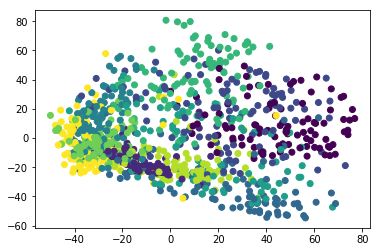

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.011s...
[t-SNE] Computed neighbors for 1000 samples in 0.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 16.854721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.409477
[t-SNE] Error after 600 iterations: 0.881833


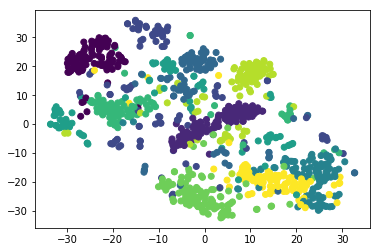

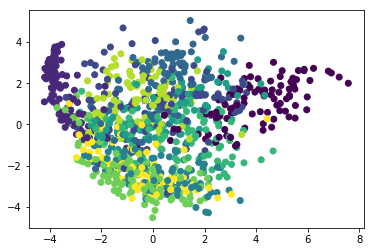

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.019s...
[t-SNE] Computed neighbors for 1000 samples in 1.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.899746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.817284
[t-SNE] Error after 600 iterations: 0.905179


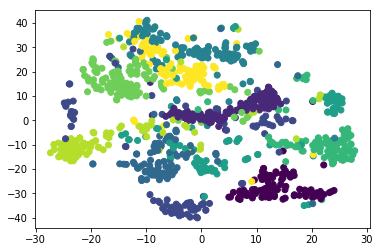

In [40]:
from keras.models import Model
data = x_train_short

model = cnn_model  # include here your original model

layer_name = 'flat_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data)

x_transform = intermediate_output

group_visualize(x_transform, 'pca')
group_visualize(x_transform, 'tsne')

x_transform = np.reshape(x_train_short,(1000,28*28))
group_visualize(x_transform, 'pca')
group_visualize(x_transform, 'tsne')